In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import umap
import umap.plot

In [4]:
with open("data/tic-tac-toe.names") as file:
    for line in file:
        print(line)

1. Title: Tic-Tac-Toe Endgame database



2. Source Information

   -- Creator: David W. Aha (aha@cs.jhu.edu)

   -- Donor: David W. Aha (aha@cs.jhu.edu)

   -- Date: 19 August 1991

 

3. Known Past Usage: 

   1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive

      induction on decision trees.  In {\it Proceedings of the

      Eleventh International Joint Conference on Artificial Intelligence} 

      (pp. 645--650).  Detroit, MI: Morgan Kaufmann.

      -- CITRE was applied to 100-instance training and 200-instance test

         sets.  In a study using various amounts of domain-specific

         knowledge, its highest average accuracy was 76.7% (using the

         final decision tree created for testing).



   2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through

      feature construction.  In {\it Proceedings of the Eighth National

      Conference on Artificial Intelligence} (pp. 803--808). 

      Boston, MA: AAAI Press.

      -- Similar experiments 

In [5]:
# loading data
df = pd.read_csv("data/tic-tac-toe.data")
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [6]:
# replacing class with ints
df = df.replace({"negative": 0,"positive":1})
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,0
954,o,x,o,x,x,o,x,o,x,0
955,o,x,o,x,o,x,x,o,x,0
956,o,x,o,o,x,x,x,o,x,0


In [7]:
# # replacing x,o,b with 1,0,-1
# df = df.replace({"x": 1,"o":0,"b":-1})
# df

In [12]:
# separate class and it's position info
y = df.Class
X = df.copy()

# deleting extra class info
X.drop(columns=['Class'], axis=1, inplace=True)

le = LabelEncoder()

le.fit(X[X.columns[0]])

for feature in X.columns:
    X[feature] = le.transform(X[feature])
X

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


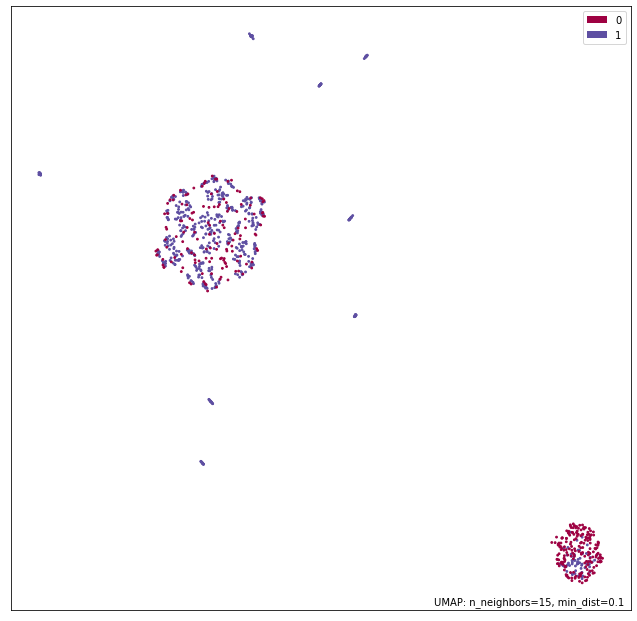

In [13]:
mapper = umap.UMAP().fit(X)
umap.plot.points(mapper, labels=y)

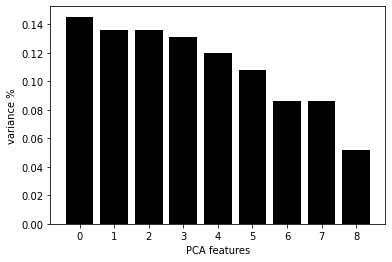

In [15]:
# Create a PCA instance: pca
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

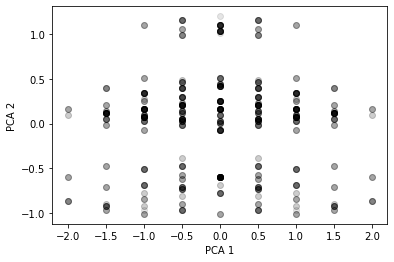

In [17]:
plt.scatter(PCA_components[0], PCA_components[8], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print()
print('Размеры X и y для обучения: ')
print(X_train.shape)
print(y_train.shape)
print('Размеры X и y для тестов: ')
print(X_test.shape)
print(y_test.shape)


Размеры X и y для обучения: 
(479, 9)
(479,)
Размеры X и y для тестов: 
(479, 9)
(479,)


In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print()
print('Логистическая регрессия: ')
print("training accuracy :", logreg.score(X_train, y_train))
print("testing accuracy :", logreg.score(X_test, y_test))


Логистическая регрессия: 
training accuracy : 0.6847599164926931
testing accuracy : 0.6492693110647182


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    print(cm)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.24223602 0.75776398]
 [0.14465409 0.85534591]]


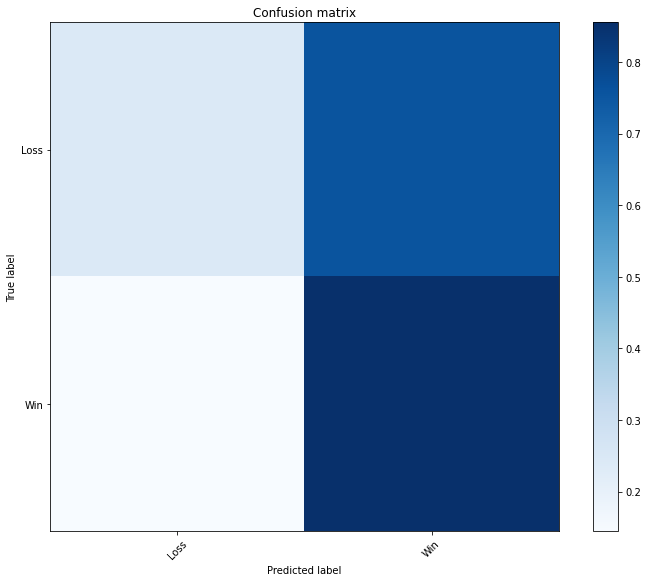

In [10]:
conf_matrix = metrics.confusion_matrix(y_test, logreg.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-logreg.png")
plt.show()


In [11]:
# Дерево решений
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print()
print('Decision Tree: ')
print("training accuracy :", tree.score(X_train, y_train))
print("testing accuracy :", tree.score(X_test, y_test))


Decision Tree: 
training accuracy : 1.0
testing accuracy : 0.8977035490605428


Normalized confusion matrix
[[0.83229814 0.16770186]
 [0.06918239 0.93081761]]


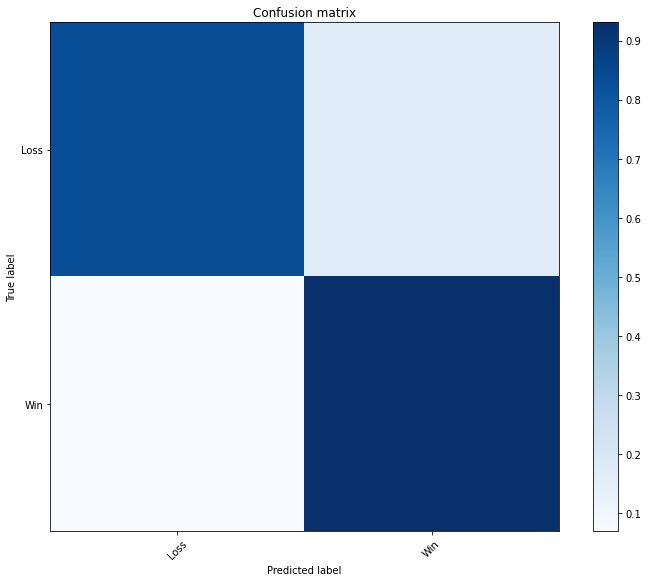

In [12]:
conf_matrix = metrics.confusion_matrix(y_test, tree.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-tree.png")
plt.show()


In [13]:
rndfrst = RandomForestClassifier()
rndfrst.fit(X_train, y_train)
print()
print('Random forest: ')
print("training accuracy :", rndfrst.score(X_train, y_train))
print("testing accuracy :", rndfrst.score(X_test, y_test))


Random forest: 
training accuracy : 1.0
testing accuracy : 0.9457202505219207


Normalized confusion matrix
[[0.85093168 0.14906832]
 [0.00628931 0.99371069]]


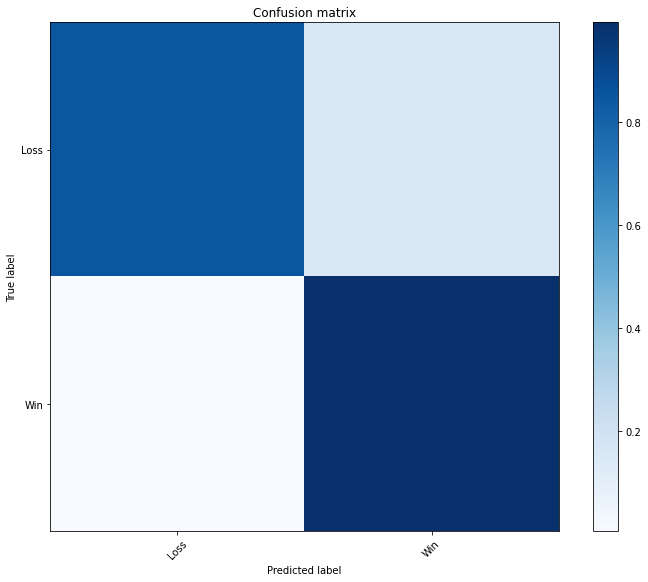

In [14]:
conf_matrix = metrics.confusion_matrix(y_test, rndfrst.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-random-forest.png")
plt.show()

In [15]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print()
print('Ada boost: ')
print("training accuracy :", ada.score(X_train, y_train))
print("testing accuracy :", ada.score(X_test, y_test))


Ada boost: 
training accuracy : 0.8121085594989561
testing accuracy : 0.7807933194154488


Normalized confusion matrix
[[0.57142857 0.42857143]
 [0.11320755 0.88679245]]


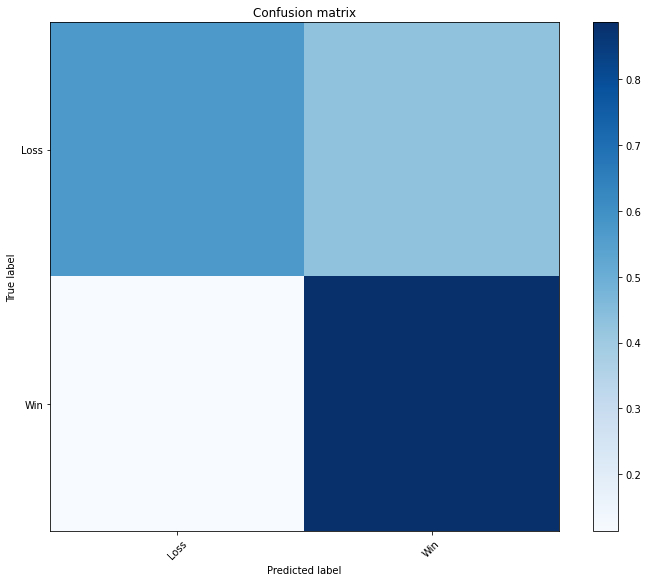

In [16]:
conf_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-ada.png")
plt.show()